# LAB 1

### (a)

In [23]:
def insert_sort(arr, comp_cnt):
    n = len(arr)
    for i in range(1, n):
        for j in range (i, 0, -1):
            comp_cnt += 1
            if arr[j] < arr[j - 1]:
                arr[j], arr[j - 1] = arr[j - 1], arr[j]
            else:
                break
    return arr, comp_cnt

def merge_sort(arr, S, comp_cnt):
    n = len(arr)
    sorted_arr = []
    total_cnt = comp_cnt

    if (n <= S):
        sorted_arr, total_cnt = insert_sort(arr, comp_cnt)
    else:
        mid  = int(n / 2)
        l, lcnt = merge_sort(arr[:mid], S, comp_cnt) 
        r, rcnt = merge_sort(arr[mid:], S, comp_cnt)

        comp_cnt = lcnt + rcnt
        sorted_arr, total_cnt = merge(l, r, comp_cnt)

    return sorted_arr, total_cnt
    
def merge(arr_1, arr_2, comp_cnt):
    sort = []
    i, j = 0, 0

    while i < len(arr_1) and j < len(arr_2):
        comp_cnt += 1
        if arr_1[i] < arr_2[j]:
            sort.append(arr_1[i])
            i += 1
        else:
            sort.append(arr_2[j])
            j += 1

    # Append remaining elements
    sort.extend(arr_1[i:])
    sort.extend(arr_2[j:])

    return sort, comp_cnt

In [24]:
arr = [7, 2, 5, 3, 9, 1]
threshold = 3
sorted_arr, comparisons = merge_sort(arr, threshold, 0)
print("Sorted:", sorted_arr)
print("Comparisons:", comparisons)

Sorted: [1, 2, 3, 5, 7, 9]
Comparisons: 11


In [25]:
import numpy as np
import pandas as pd

def generate_test_data(sizes):
    data = {}
    for size in sizes:
        arr = np.random.randint(1, size + 1, size).tolist()
        data[size] = arr
    return data

sizes = [1_000, 5_000, 10_000, 50_000, 100_000, 500_000, 1_000_000, 5_000_000, 10_000_000]
test_data = generate_test_data(sizes)


In [26]:
results = []

for size, arr in test_data.items():
    _, comparisons = merge_sort(arr, S=100, comp_cnt=0)  # You can tune S later
    results.append({'Array Size': size, 'Comparisons': comparisons})

df = pd.DataFrame(results)


In [27]:
df

,Array Size,Comparisons
0,1000,20109
1,5000,132620
2,10000,272067
3,50000,1712300
4,100000,3506073
5,500000,14448470
6,1000000,29898011
7,5000000,178644027
8,10000000,367316400


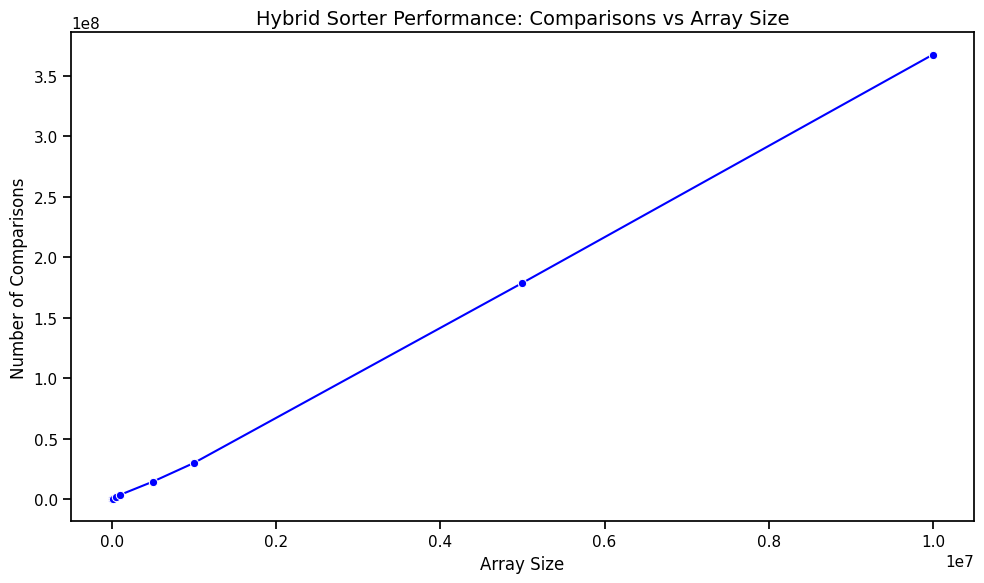

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
# sns.set(style="seaborn-v0_8")

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Array Size', y='Comparisons', marker='o', color='blue')

# Label the axes and add a title
plt.xlabel('Array Size', fontsize=12)
plt.ylabel('Number of Comparisons', fontsize=12)
plt.title('Hybrid Sorter Performance: Comparisons vs Array Size', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


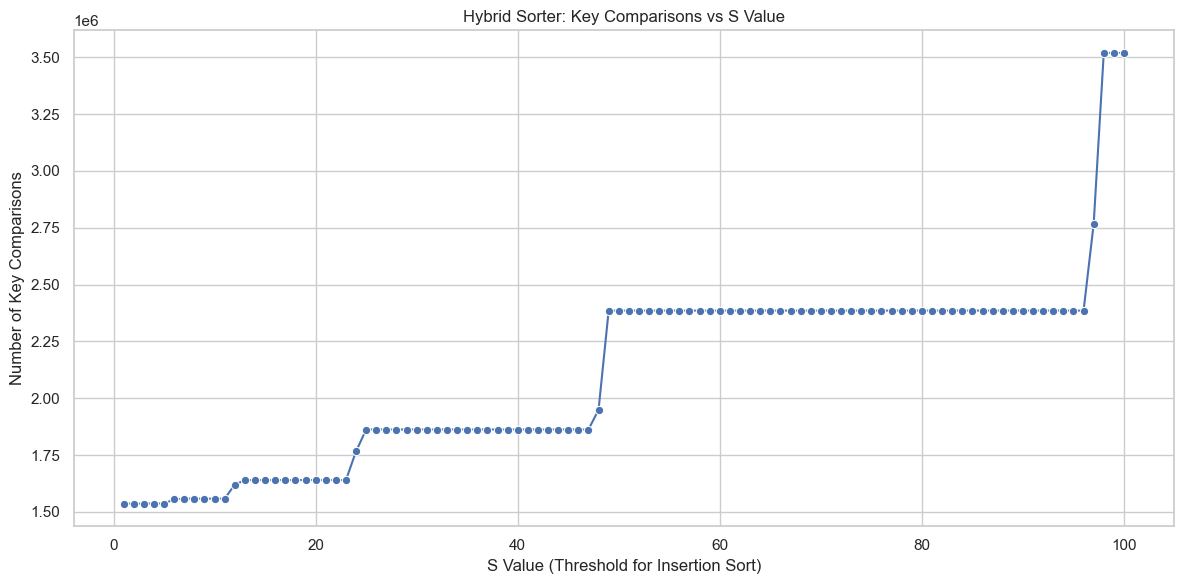

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Your hybrid sorter functions ---
# (Assuming insert_sort, merge_sort, and merge are already defined)

# --- Generate a fixed random array ---
array_size = 100_000
base_array = np.random.randint(1, array_size + 1, array_size).tolist()

# --- Run hybrid sorter for S in range 0 to 100 ---
results = []
for S in range(1, 101):
    arr_copy = base_array.copy()
    _, comparisons = merge_sort(arr_copy, S, comp_cnt=0)
    results.append({'S Value': S, 'Comparisons': comparisons})

df = pd.DataFrame(results)

# --- Plot the results ---
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='S Value', y='Comparisons', marker='o')
plt.title('Hybrid Sorter: Key Comparisons vs S Value')
plt.xlabel('S Value (Threshold for Insertion Sort)')
plt.ylabel('Number of Key Comparisons')
plt.tight_layout()
plt.show()
